Epoch 1/3
300/300 - 98s - loss: 0.2167 - accuracy: 0.9332 - val_loss: 0.0538 - val_accuracy: 0.9816
Epoch 2/3
300/300 - 95s - loss: 0.0660 - accuracy: 0.9805 - val_loss: 0.0357 - val_accuracy: 0.9882
Epoch 3/3
300/300 - 95s - loss: 0.0486 - accuracy: 0.9853 - val_loss: 0.0342 - val_accuracy: 0.9881
The model has successfully trained
The model has  successfully saved'


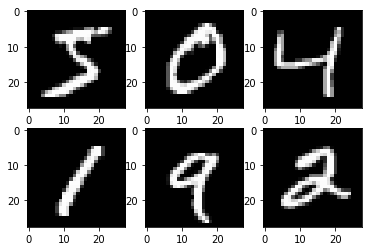

In [2]:
#import libraries import keras
from keras.datasets import mnist
from keras .models import Sequential
from keras.layers import Dense
from keras .layers import Dropout 
from keras.layers import Flatten
from keras.layers .convolutional import Convolution2D
from keras.layers .convolutional import MaxPooling2D 
from keras.utils import to_categorical
from keras import backend as K 
import numpy
import pandas as pd
# loading the data set
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#plotting the data set
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(int('23'+str(i+1)))
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
#reshape format (samples((width)[hei9ht )[channels)
X_train =  X_train.reshape (X_train.shape[0], 28, 28,1 ).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0] , 28, 28,1).astype( 'float32' )


#converts a class vector {integers) to binary class matrix
y_train = to_categorical(y_train )
y_test = to_categorical (y_test)
#normalize inputs
X_train=X_train/255
X_test=X_test/255
#define a CNN model 
def create_model():
    num_classes = 10
    model = Sequential()
    model.add(Convolution2D(32,kernel_size=(3, 3),activation='relu',input_shape=(28,28,1))) 
    model.add(Convolution2D (64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25)) 
    model.add(Flatten())
    model.add(Dense(256, activation= 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax' ))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy' ]) 
    return model

#build the model
model=create_model()
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200,verbose=2)
print("The model has successfully trained")

#Save the model model.
model.save('model.h5')
print("The model has  successfully saved'" )


In [3]:
import os
import PIL
import cv2
import glob
import numpy as np
from tkinter import *
from PIL import Image,ImageDraw,ImageGrab
#////////-----------MODEL CODE LEFT--------//////

def clear_widget(): 
    global cv
    #To clear a canvas 
    cv.delete("all")

def activate_event(event): 
    global lastx, lasty
    # <Bl-Motion>
    cv .bind('<B1-Motion>', draw_lines) 
    lastx, lasty =event.x, event.y

def draw_lines(event): 
    global lastx, lasty
    x, y = event.x, event.y
    # do the canvas drawings
    cv .create_line((lastx, lasty, x, y),width=8, fill= 'black', capstyle=ROUND, smooth=TRUE, splinesteps=12)
    lastx, lasty = x, y
def Recognize_Digit(): 
    global image_number 
    predictions = [] 
    percentage=[]
    #image_number = O
    filename = f'image_{image_number }.png'
    widget=cv


# get the widget coordinates 
    x=root.winfo_rootx()+widget.winfo_x() 
    y=root.winfo_rooty()+widget.winfo_y() 
    xl=x+widget.winfo_width ()
    yl=y+widget.winfo_height ()


#g rab the image, crop it according to my requirement and saved it in png format
    ImageGrab.grab().crop((x,y,xl ,yl)).save(filename)
    # read the image in color format
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    #convert the image in grayscale
    gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# applying Otsu thresholding
    ret ,th = cv2 .threshold (gray,0,255 ,cv2.THRESH_BINARY_INV+cv2 .THRESH_OTSU )
#findcontour() function helps in extracting the contours from the image.
    contours= cv2.findContours (th , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)[0]
    for cnt in contours:
        # Get bounding box and extract ROI 
        x,y,w,h = cv2.boundingRect(cnt)
# Create rectangle
        cv2.rectangle (image, (x,y), (x+w, y+h), (255,0,0), 1) 
        top = int(0.05 * th.shape[0])
        bottom = top
        left = int (0.05 * th.shape[1])
 
        right=left
        th_up=cv2.copyMakeBorder(th, top, bottom, left, right, cv2.BORDER_REPLICATE)
 
        #Extract the image ROI
        roi= th[y-top:y+h+bottom, x-left:x+w+right]
        # resize roi image to 28x28 pixels
        img = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
        #reshaping the image to support our model input 
        img = img.reshape (1,28,28,1)
        #normalizing the image to support our model input 
        img = img/255.0
        #its time to predict the result
        pred = model.predict ([img])[0]
        #numpy.argmax (input array) Returns the indices of the maximum values.
        final_pred = np.argmax (pred)
        data = str (final_pred) +'  '+ str(int(max(pred)*100))+'%'
        #cv2.putText ()method is used to draw a text string on image. 
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.5
        color = (255, 0, 0)
        thickness = 1
        cv2.putText (image, data, (x,y-5), font, fontScale, color, thickness)


    # Showing the predicted results on new window.
    cv2.imshow('image', image)
    cv2.waitKey (0)
root=Tk()
root.resizable(0,0)
root.title("HAND-WRITTEN DIGIT RECOGNISTION")
lastx,lasty=None,None
image_number=0
cv=Canvas(root,width=640,height=480,bg="white")
cv.grid(row=0,column=0,pady=2,sticky=W,columnspan=2)
cv.bind('<Button-1>',activate_event)
btn_save = Button(text="Recognize Digit", command=Recognize_Digit) 
btn_save.grid(row=2, column=0 , pady=1, padx=1)
button_clear = Button(text = "Clear Widget", command = clear_widget)
button_clear.grid(row=2, column=1 , pady=1 , padx=1)

root .mainloop()